# Exploratory Data Analysis (EDA)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:
df = pd.read_csv("titanic_train.csv")

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The Problem?
We need to train the model and classify based on the data who's going to survive the titanic wreck incident

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_missing      0
dtype: int64

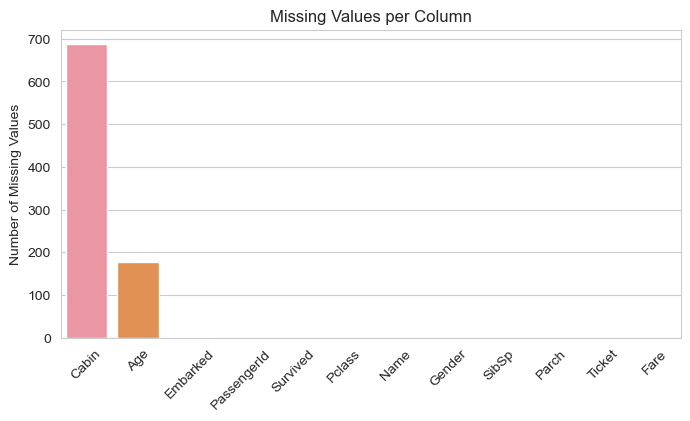

In [ ]:
missing_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=missing_counts.index, 
            y=missing_counts.values)
plt.xticks(rotation=45)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()


# odd median: [2,5,1,4,10] -> [1,2,4,5,10] -> 4
# even median: [2,3,12,1,0,15] -> [0,1,2,3,12,15] -> (2+3)/2 = 2.5


<Axes: >

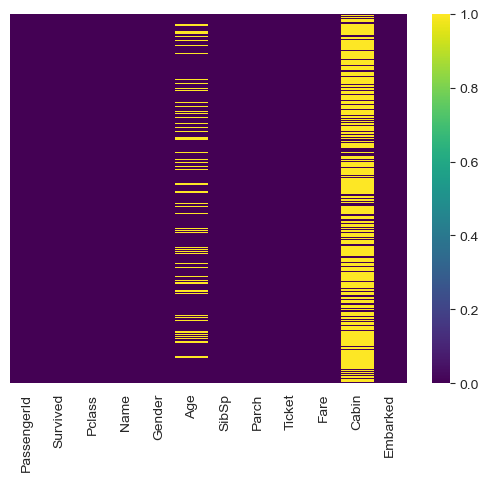

In [56]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = "viridis")

In [61]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

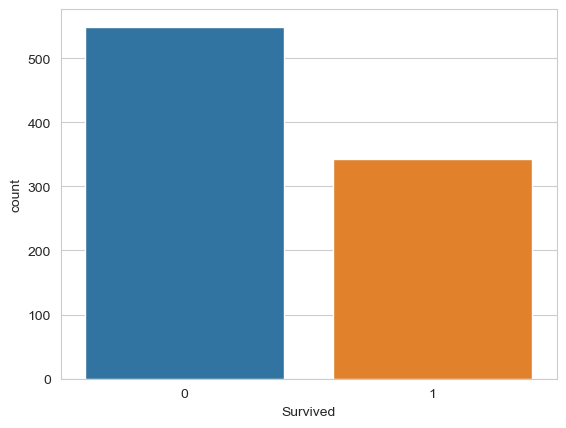

In [62]:
sns.countplot(x = "Survived", data = df)

<Axes: xlabel='Survived', ylabel='count'>

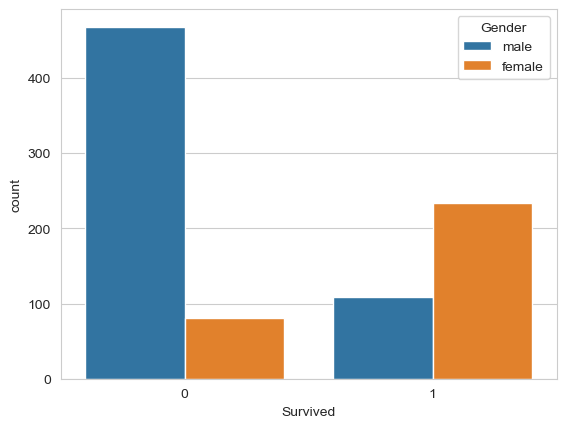

In [63]:
sns.countplot(x = "Survived", data = df, hue = "Gender")

<Axes: xlabel='Survived', ylabel='count'>

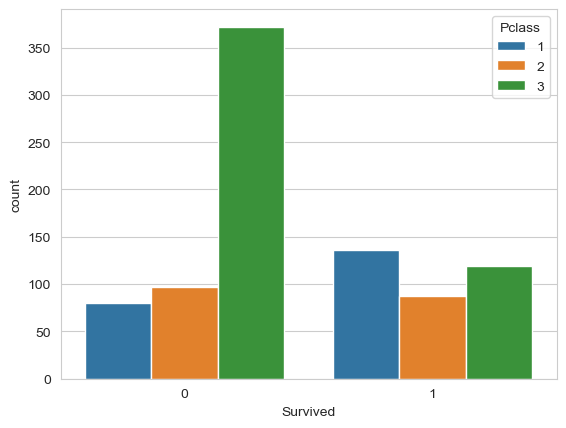

In [9]:
sns.countplot(x = "Survived", data = df, hue = "Pclass")

<Axes: xlabel='Survived', ylabel='count'>

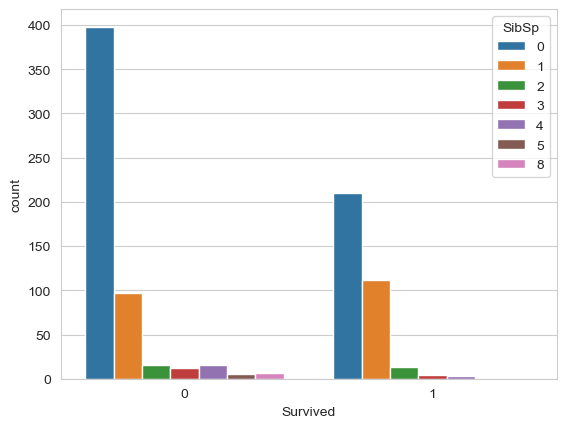

In [10]:
sns.countplot(x = "Survived", data = df, hue = "SibSp")

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

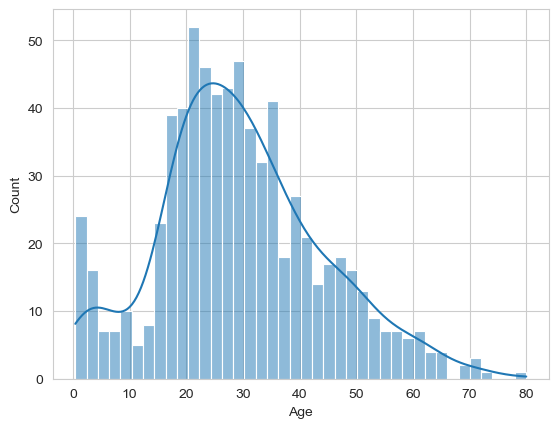

In [11]:
sns.histplot(df["Age"].dropna(), bins = 40, kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

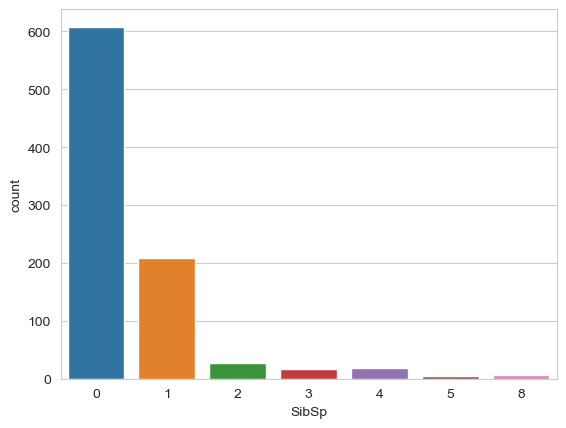

In [12]:
sns.countplot(x = 'SibSp', data = df)

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

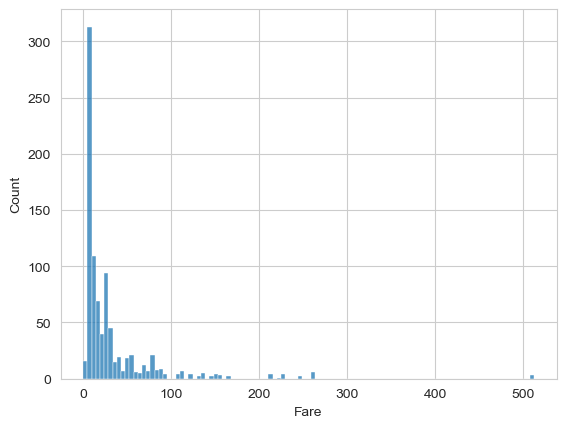

In [13]:
sns.histplot(x = "Fare", data = df)

<Axes: >

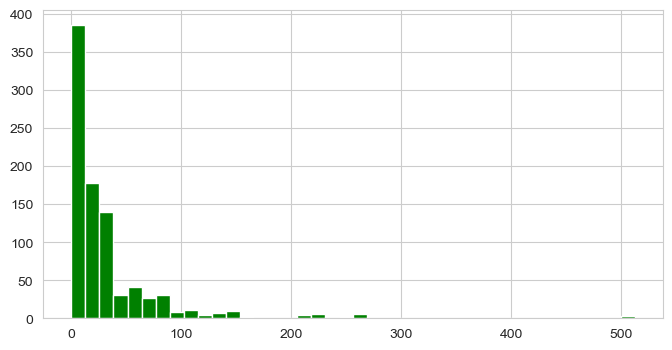

In [14]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

In [64]:
plt.figure(figsize = (12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Pclass', ylabel='Age'>

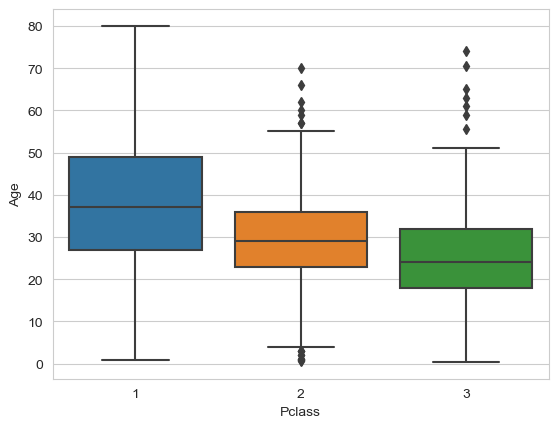

In [16]:
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [17]:
df.groupby("Pclass")["Age"].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [65]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("median"), inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8552\251675349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df.groupby("Pclass")["Age"].transform("median"), inplace = True)


In [66]:
df["Age"].median()

26.0

# Another way to do the same thing is through a function

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1) # axis = 1 means that the function is applied row-wise

<Axes: >

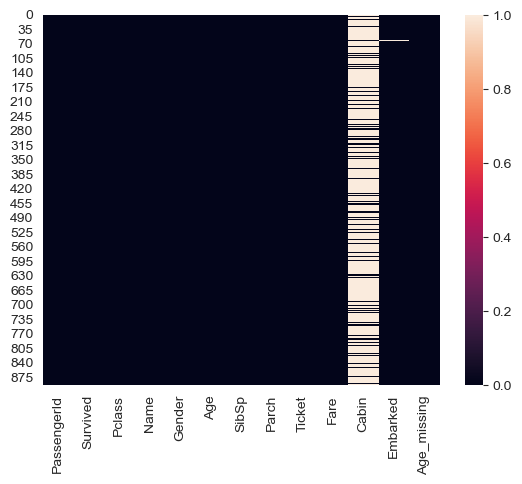

In [67]:
sns.heatmap(df.isnull())

In [68]:
df.drop("Cabin", axis = 1, inplace = True)

In [69]:
df.dropna(inplace=True)

In [23]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

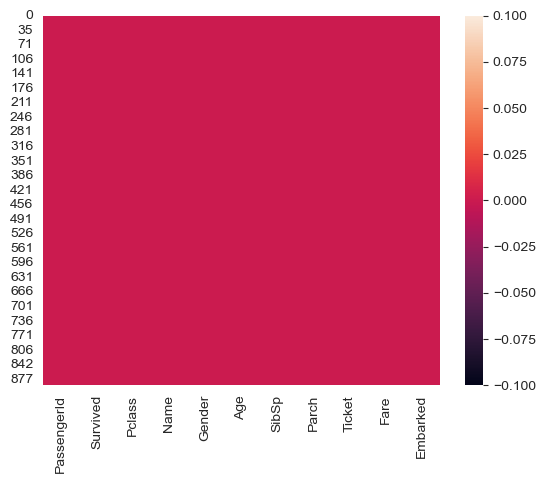

In [24]:
sns.heatmap(df.isnull())

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Gender       889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [70]:
embarked = pd.get_dummies(df["Embarked"], drop_first = True, dtype = int)

In [71]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [72]:
Gender = pd.get_dummies(df["Gender"], drop_first = True, dtype = int)

In [73]:
Gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [74]:
df.drop(["Name", "Ticket", "Embarked", "Gender"], axis = 1, inplace = True)

In [75]:
df = pd.concat([df, Gender, embarked], axis = 1)

In [76]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_missing,male,Q,S
0,1,0,3,22.0,1,0,7.2500,False,1,0,1
1,2,1,1,38.0,1,0,71.2833,False,0,0,0
2,3,1,3,26.0,0,0,7.9250,False,0,0,1
3,4,1,1,35.0,1,0,53.1000,False,0,0,1
4,5,0,3,35.0,0,0,8.0500,False,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,1,0,1
887,888,1,1,19.0,0,0,30.0000,False,0,0,1
888,889,0,3,24.0,1,2,23.4500,True,0,0,1
889,890,1,1,26.0,0,0,30.0000,False,1,0,0


Great! Our data is ready for our model!

# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split

In [77]:
y = df.Survived

In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [79]:
x = df.drop("Survived", axis = 1).values

x

array([[1, 3, 22.0, ..., 1, 0, 1],
       [2, 1, 38.0, ..., 0, 0, 0],
       [3, 3, 26.0, ..., 0, 0, 1],
       ...,
       [889, 3, 24.0, ..., 0, 0, 1],
       [890, 1, 26.0, ..., 1, 0, 0],
       [891, 3, 32.0, ..., 1, 1, 0]], dtype=object)

In [80]:
x

array([[1, 3, 22.0, ..., 1, 0, 1],
       [2, 1, 38.0, ..., 0, 0, 0],
       [3, 3, 26.0, ..., 0, 0, 1],
       ...,
       [889, 3, 24.0, ..., 0, 0, 1],
       [890, 1, 26.0, ..., 1, 0, 0],
       [891, 3, 32.0, ..., 1, 1, 0]], dtype=object)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 100)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression()

In [85]:
model.fit(x_train, y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
x_test

array([[640, 3, 24.0, ..., 1, 0, 1],
       [148, 3, 9.0, ..., 0, 0, 1],
       [279, 3, 7.0, ..., 1, 1, 0],
       ...,
       [267, 3, 16.0, ..., 1, 0, 1],
       [710, 3, 24.0, ..., 1, 0, 0],
       [873, 1, 33.0, ..., 1, 0, 1]], dtype=object)

In [86]:
predictions = model.predict(x_test)

In [87]:
predictions

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [88]:
model.score(x_test, y_test)

0.797752808988764

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [47]:
from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(y_test,predictions)

accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)